In [1]:
import pandas as pd

# Read the file data
data_var = pd.read_csv('Fuel_Consumption_2000-2022.csv', sep = '\,', engine = 'python')

# Make a copy of the file data variable into a DataFrame
data_df = data_var.copy()

pd.options.display.max_columns = None #displays all columns
pd.options.display.max_rows = 10 #displays 10 rows

data_df

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
22552,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
22553,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
22554,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236


In [2]:
# Get an overview of the data
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


In [3]:
# Assuming the insight needed is related to limiting fuel consumption and emissiions by making informed car purchase choices
# Assuming we do not need these columns - HWY, COMB (L/100m) and COMB (mpg)
data_df = data_df.drop(['HWY (L/100 km)', 'COMB (L/100 km)', 'COMB (mpg)'], axis = 1)
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   EMISSIONS         22556 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 1.7+ MB


In [4]:
# Display numeric columns
numeric_columns = data_df.select_dtypes(exclude=['object'])
numeric_columns.head(15)

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,EMISSIONS
0,2000,1.6,4,9.2,186
1,2000,1.6,4,8.5,175
2,2000,3.2,6,12.2,230
3,2000,3.5,6,13.4,264
4,2000,1.8,4,10.0,198
...,...,...,...,...,...
10,2000,1.8,4,9.7,193
11,2000,2.8,6,13.0,248
12,2000,2.8,6,11.7,225
13,2000,1.8,4,12.1,232


In [5]:
# Display non_numeric columns
non_numeric_columns = data_df.select_dtypes(include=['object'])
non_numeric_columns.head(15)

,MAKE,MODEL,VEHICLE CLASS,TRANSMISSION,FUEL
0,ACURA,1.6EL,COMPACT,A4,X
1,ACURA,1.6EL,COMPACT,M5,X
2,ACURA,3.2TL,MID-SIZE,AS5,Z
3,ACURA,3.5RL,MID-SIZE,A4,Z
4,ACURA,INTEGRA,SUBCOMPACT,A4,X
...,...,...,...,...,...
10,AUDI,A4,COMPACT,M5,Z
11,AUDI,A4,COMPACT,A5,Z
12,AUDI,A4,COMPACT,M5,Z
13,AUDI,A4 QUATTRO,COMPACT,A5,Z


In [6]:
pd.options.display.max_rows = None #displays all rows
data_df['YEAR'].unique()
# data_df['YEAR'].value_counts()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022], dtype=int64)

In [7]:
# data_df['MAKE'].value_counts()
data_df['MAKE'].unique()

array(['ACURA', 'AUDI', 'BMW', 'BUICK', 'CADILLAC', 'CHEVROLET',
       'CHRYSLER', 'DAEWOO', 'DODGE', 'FERRARI', 'FORD', 'GMC', 'HONDA',
       'HYUNDAI', 'INFINITI', 'ISUZU', 'JAGUAR', 'JEEP', 'KIA',
       'LAND ROVER', 'LEXUS', 'LINCOLN', 'MAZDA', 'MERCEDES-BENZ',
       'NISSAN', 'OLDSMOBILE', 'PLYMOUTH', 'PONTIAC', 'PORSCHE', 'SAAB',
       'SATURN', 'SUBARU', 'SUZUKI', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO',
       'BENTLEY', 'ROLLS-ROYCE', 'MASERATI', 'MINI', 'MITSUBISHI',
       'SMART', 'HUMMER', 'ASTON MARTIN', 'LAMBORGHINI', 'BUGATTI',
       'SCION', 'FIAT', 'RAM', 'SRT', 'ALFA ROMEO', 'GENESIS', 'Acura',
       'Alfa Romeo', 'Aston Martin', 'Audi', 'Bentley', 'Bugatti',
       'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ford',
       'Genesis', 'Honda', 'Hyundai', 'Infiniti', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land Rover', 'Lexus', 'Lincoln', 'Maserati',
       'Mazda', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Porsche', 'Ram',
       'Rolls-Royce', 'Sub

In [8]:
data_df['VEHICLE CLASS'] = data_df['VEHICLE CLASS'].replace(to_replace = 'COMPACT', value = 'Compact')
data_df['VEHICLE CLASS'] = data_df['VEHICLE CLASS'].replace(to_replace = 'FULL-SIZE', value = 'Full-size')
data_df['VEHICLE CLASS'] = data_df['VEHICLE CLASS'].replace(to_replace = 'MID-SIZE', value = 'Mid-size')
data_df['VEHICLE CLASS'] = data_df['VEHICLE CLASS'].replace(to_replace = 'MINICOMPACT', value = 'Minicompact')
data_df['VEHICLE CLASS'] = data_df['VEHICLE CLASS'].replace(to_replace = 'MINIVAN', value = 'Minivan')
data_df['VEHICLE CLASS'] = data_df['VEHICLE CLASS'].replace(to_replace = 'PICKUP TRUCK - SMALL', value = 'Pickup truck: Small')
data_df['VEHICLE CLASS'] = data_df['VEHICLE CLASS'].replace(to_replace = 'PICKUP TRUCK - STANDARD', value = 'Pickup truck: Standard')
data_df['VEHICLE CLASS'] = data_df['VEHICLE CLASS'].replace(to_replace = 'SPECIAL PURPOSE VEHICLE', value = 'Special purpose vehicle')


data_df['VEHICLE CLASS'] = data_df['VEHICLE CLASS'].replace(to_replace = 'STATION WAGON - MID-SIZE', value = 'Station wagon: Mid-size')
data_df['VEHICLE CLASS'] = data_df['VEHICLE CLASS'].replace(to_replace = 'STATION WAGON - SMALL', value = 'Station wagon: Small')

data_df['VEHICLE CLASS'] = data_df['VEHICLE CLASS'].replace(to_replace = 'SUV - SMALL', value = 'SUV: Small')
data_df['VEHICLE CLASS'] = data_df['VEHICLE CLASS'].replace(to_replace = 'SUV - STANDARD', value = 'SUV: Standard')

data_df['VEHICLE CLASS'] = data_df['VEHICLE CLASS'].replace(to_replace = 'TWO-SEATER', value = 'Two-seater')

data_df['VEHICLE CLASS'] = data_df['VEHICLE CLASS'].replace(to_replace = 'VAN - PASSENGER', value = 'Van: Passenger')

data_df['VEHICLE CLASS'] = data_df['VEHICLE CLASS'].replace(to_replace = 'SUBCOMPACT', value = 'Subcompact')

data_df['VEHICLE CLASS'] = data_df['VEHICLE CLASS'].replace(to_replace = 'VAN - CARGO', value = 'Van - Cargo')

# sorted(data_df['VEHICLE CLASS'].unique())

data_df['VEHICLE CLASS'].value_counts()

Compact                    3127
Mid-size                   2960
SUV                        2640
Pickup truck: Standard     2204
Subcompact                 2010
SUV: Small                 1756
Full-size                  1503
Two-seater                 1312
SUV: Standard              1122
Minicompact                 994
Station wagon: Small        877
Pickup truck: Small         511
Minivan                     408
Station wagon: Mid-size     387
Van - Cargo                 332
Van: Passenger              299
Special purpose vehicle     114
Name: VEHICLE CLASS, dtype: int64

In [9]:

data_df['MODEL'] = data_df['MODEL'].str.title()
# len(data_df['MODEL'].unique())
data_df['MODEL'].value_counts().head(15)


Mustang          110
Jetta             97
Sierra            77
Silverado         77
Corolla           70
Sierra 4Wd        70
Silverado 4Wd     70
Sentra            68
Accord            62
Ranger            61
Tacoma            61
Passat            60
Canyon            60
Colorado          60
Altima            60
Name: MODEL, dtype: int64

In [10]:
# len(data_df['ENGINE SIZE'].value_counts())
data_df['ENGINE SIZE'].value_counts().head(15)

2.0    3020
3.0    2070
2.5    1506
3.5    1467
5.3    1230
2.4    1226
3.6    1173
4.0     707
1.6     697
1.8     646
3.8     515
5.0     475
3.7     448
2.7     417
6.2     415
Name: ENGINE SIZE, dtype: int64

In [11]:
data_df['CYLINDERS'].value_counts()

4     8049
6     8021
8     5187
5      499
12     451
10     162
3      159
2       16
16      12
Name: CYLINDERS, dtype: int64

In [12]:
# len(data_df['TRANSMISSION'].value_counts())
data_df['TRANSMISSION'].value_counts().head(15)

A4      3519
AS6     2834
M6      2609
M5      2104
A6      1965
AS8     1733
A5      1420
AS5      865
AV       816
A8       794
AM7      689
AS7      614
A9       529
AS10     335
A7       278
Name: TRANSMISSION, dtype: int64

In [13]:
data_df['FUEL'].value_counts()

X    11822
Z     9316
E     1071
D      314
N       33
Name: FUEL, dtype: int64

In [14]:
numeric_columns.describe()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,EMISSIONS
count,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000
mean,2011.554442,3.356646,5.854141,12.763513,250.068452
std,6.298269,1.335425,1.819597,3.500999,59.355276
min,2000.000000,0.800000,2.000000,3.500000,83.000000
25%,2006.000000,2.300000,4.000000,10.400000,209.000000
50%,2012.000000,3.000000,6.000000,12.300000,243.000000
75%,2017.000000,4.200000,8.000000,14.725000,288.000000
max,2022.000000,8.400000,16.000000,30.600000,608.000000


array([[<AxesSubplot:title={'center':'YEAR'}>,
        <AxesSubplot:title={'center':'ENGINE SIZE'}>],
       [<AxesSubplot:title={'center':'CYLINDERS'}>,
        <AxesSubplot:title={'center':'FUEL CONSUMPTION'}>],
       [<AxesSubplot:title={'center':'EMISSIONS'}>, <AxesSubplot:>]],
      dtype=object)

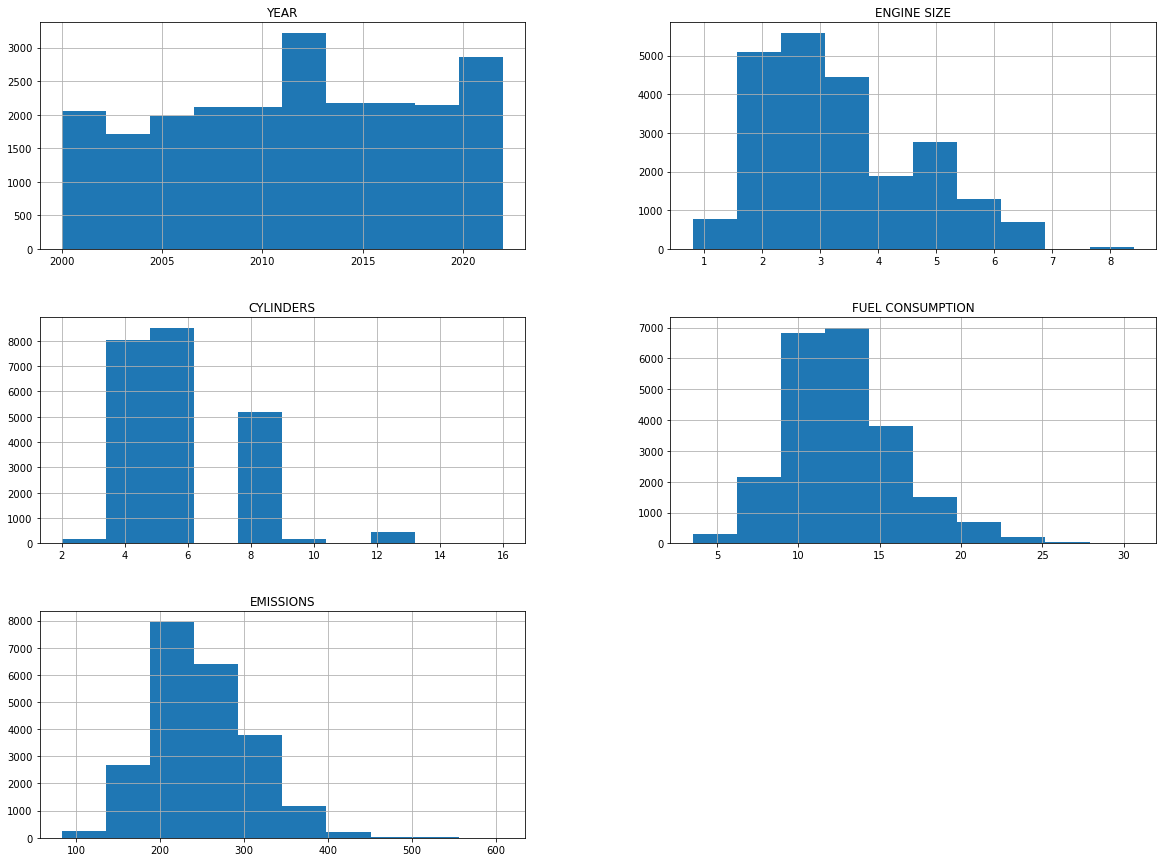

In [15]:
numeric_columns.hist(figsize = (20, 15))

<AxesSubplot:xlabel='ENGINE SIZE', ylabel='FUEL CONSUMPTION'>

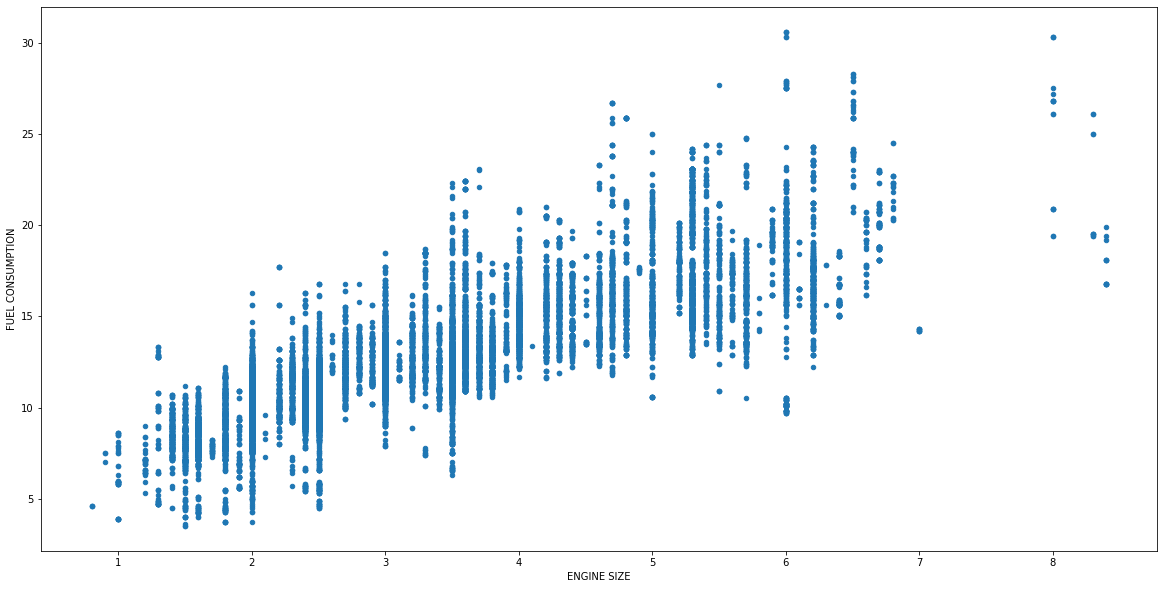

In [32]:
data_df.plot(kind = 'scatter', x = 'ENGINE SIZE', y = 'FUEL CONSUMPTION', figsize = (20, 10))

<AxesSubplot:xlabel='CYLINDERS', ylabel='FUEL CONSUMPTION'>

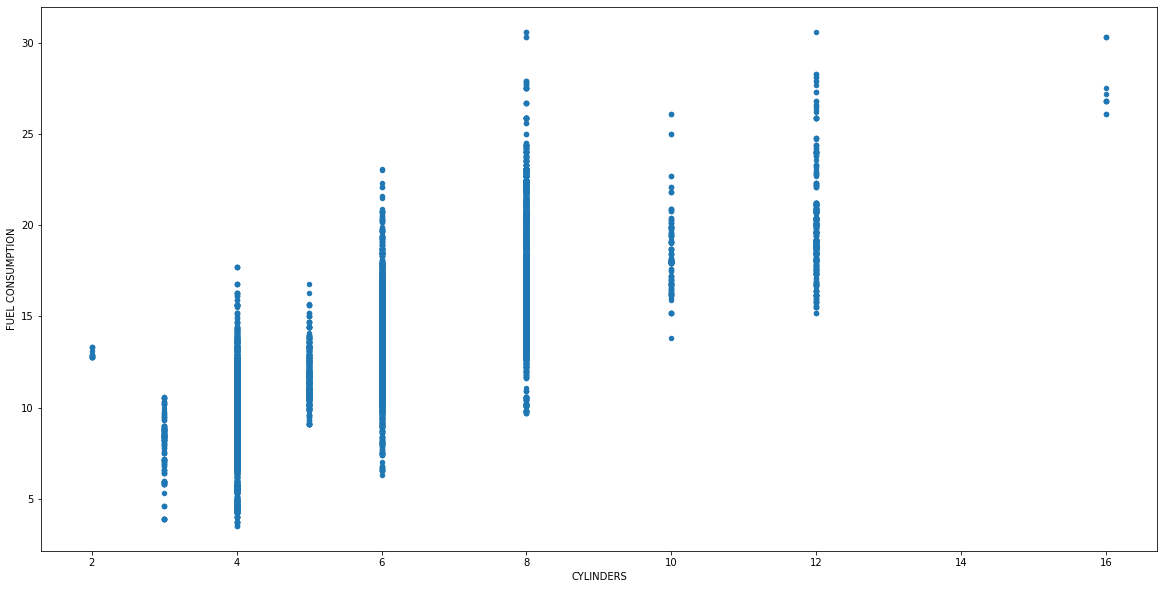

In [28]:
data_df.plot(kind = 'scatter', x = 'CYLINDERS', y = 'FUEL CONSUMPTION', figsize = (20, 10))

In [33]:
data_df.columns

Index(['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'EMISSIONS'],
      dtype='object')

<AxesSubplot:>

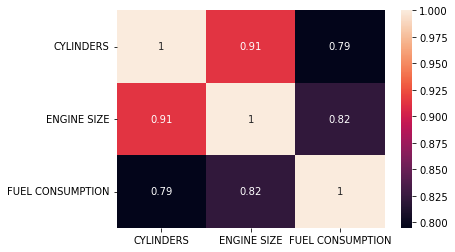

In [49]:
import seaborn as sns
corr_var = data_df[['CYLINDERS', 'ENGINE SIZE', 'FUEL CONSUMPTION']].corr()
sns.heatmap(corr_var, annot = True)

<AxesSubplot:>

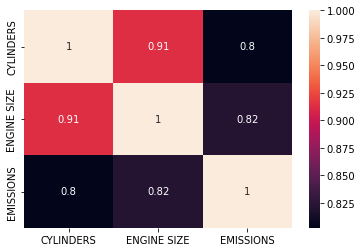

In [50]:
corr_var = data_df[['CYLINDERS', 'ENGINE SIZE', 'EMISSIONS']].corr()
sns.heatmap(corr_var, annot = True)